# Time Series Data Cleaning: Oil Town Home Price Prediction

### In this project we will look at three zipcodes that represent three different oil towns, Midland, Bakersfield, and Houston. In these towns, oil is king and drives the economy with the exception of Houston which is the energy capital of the United States but also has a diversified economy including multiple Univiersities and is home to NASA as well as many other large companies. We will explore whether house prices in these towns can be an indirect method of predicting the future of oil which is notorious for being unpredictable! 

In [2]:
df = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
# filtering out three zip codes that represent 3 oil towns in the united states

midland = df.loc[df['RegionName'] == 79706] 

houston = df.loc[df['RegionName'] == 77441]

bakersfield = df.loc[df['RegionName'] == 93311] 

In [5]:
# take a look at the structure of our data 
bakersfield.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1538,97226,93311,Bakersfield,CA,Bakersfield,Kern,1539,143600.0,142700.0,141800.0,...,274100,275600,277600,277900,277500,278300,279700,281100,282800,284200


### We have seperated the data but now we need to get it into the right format for our ARIMA and Prophet models. 

In [6]:
midland_dropped = midland.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], axis=1)

In [7]:
houston_dropped = houston.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], axis=1)

In [8]:
bakersfield_dropped = bakersfield.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], axis=1) 

### We now have our data down to only dates and average prices. Next we need to make sure we have the correct data types, the correct shape, and some basic EDA. 

In [9]:
#change data from wide to long format 

bakersfield_long = bakersfield_dropped.T

In [10]:
houston_long = houston_dropped.T

In [11]:
midland_long = midland_dropped.T

In [12]:
midland_long.head()

,4804
1996-04,111800.0
1996-05,111700.0
1996-06,111600.0
1996-07,111500.0
1996-08,111400.0


In [13]:
houston_long.head()

,7075
1996-04,209200.0
1996-05,210200.0
1996-06,211500.0
1996-07,212800.0
1996-08,214000.0


In [14]:
bakersfield_long.head()

,1538
1996-04,143600.0
1996-05,142700.0
1996-06,141800.0
1996-07,140900.0
1996-08,140100.0


In [15]:
for col in midland_long.columns: 
    print(col) 

4804


### We only have one column at the moment so before moving on we need to name each column and add an index and rename the columns. 

In [16]:
midland_long.reset_index(inplace=True)

In [17]:
houston_long.reset_index(inplace=True)

In [18]:
bakersfield_long.reset_index(inplace=True)

In [19]:
#check column names
for col in midland_long.columns: 
    print(col) 

index
4804


In [20]:
for col in houston_long.columns: 
    print(col) 

index
7075


In [21]:
for col in bakersfield_long.columns: 
    print(col) 

index
1538


In [22]:
midland_long.head()

,index,4804
0,1996-04,111800.0
1,1996-05,111700.0
2,1996-06,111600.0
3,1996-07,111500.0
4,1996-08,111400.0


In [23]:
midland_long.rename(columns = {midland_long.columns[0]: 'Date', midland_long.columns[1]:'Price'},inplace=True)

In [24]:
midland_long.head()

,Date,Price
0,1996-04,111800.0
1,1996-05,111700.0
2,1996-06,111600.0
3,1996-07,111500.0
4,1996-08,111400.0


In [25]:
houston_long.rename(columns={houston_long.columns[0]: 'Date', houston_long.columns[1]: 'Price'}, inplace=True)

In [26]:
houston_long.head()

,Date,Price
0,1996-04,209200.0
1,1996-05,210200.0
2,1996-06,211500.0
3,1996-07,212800.0
4,1996-08,214000.0


In [27]:
bakersfield_long.rename(columns={bakersfield_long.columns[0]: 'Date', bakersfield_long.columns[1]: 'Price'}, inplace=True)

In [28]:
bakersfield_long.head()

,Date,Price
0,1996-04,143600.0
1,1996-05,142700.0
2,1996-06,141800.0
3,1996-07,140900.0
4,1996-08,140100.0


### Now let's change our "Date" column to datetime format

In [29]:
bakersfield_long['Date'] =pd.to_datetime(bakersfield_long['Date'])

In [30]:
bakersfield_long.head()

,Date,Price
0,1996-04-01,143600.0
1,1996-05-01,142700.0
2,1996-06-01,141800.0
3,1996-07-01,140900.0
4,1996-08-01,140100.0


In [31]:
midland_long['Date'] =pd.to_datetime(bakersfield_long['Date'])

In [32]:
midland_long.head()

,Date,Price
0,1996-04-01,111800.0
1,1996-05-01,111700.0
2,1996-06-01,111600.0
3,1996-07-01,111500.0
4,1996-08-01,111400.0


In [33]:
houston_long['Date'] =pd.to_datetime(bakersfield_long['Date'])

In [34]:
houston_long.head()

,Date,Price
0,1996-04-01,209200.0
1,1996-05-01,210200.0
2,1996-06-01,211500.0
3,1996-07-01,212800.0
4,1996-08-01,214000.0


In [37]:
import matplotlib.pyplot as plt 

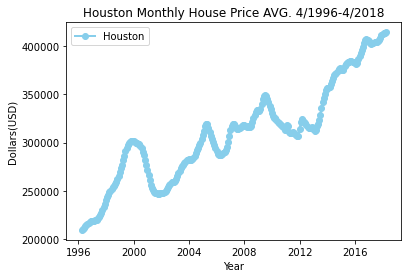

In [38]:
plt.plot( 'Date', 'Price', data=houston_long, marker='o',color='skyblue', linewidth=2,label='Houston')
plt.title('Houston Monthly House Price AVG. 4/1996-4/2018')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

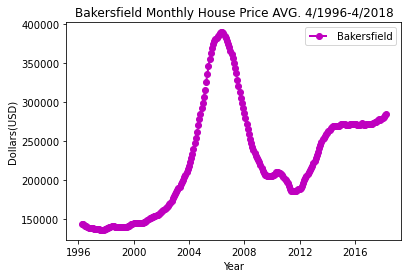

In [39]:
plt.plot( 'Date', 'Price', data=bakersfield_long, marker='o', color='m', linewidth=2, linestyle='dashed', label='Bakersfield')
plt.title('Bakersfield Monthly House Price AVG. 4/1996-4/2018')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

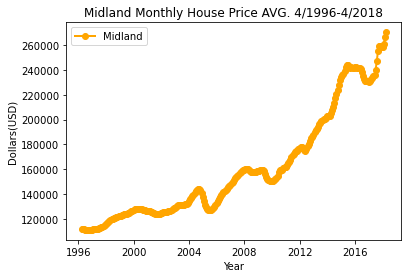

In [40]:
plt.plot( 'Date', 'Price', data=midland_long, marker='o', color='orange', linewidth=2, label= 'Midland')
plt.title('Midland Monthly House Price AVG. 4/1996-4/2018')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [73]:
houston_v = (houston_long['Date'] > '1996-04-1') & (houston_long['Date'] <= '2009-07-01')
houston_validate =houston_long.loc[houston_v]

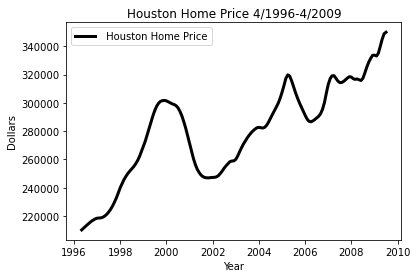

In [77]:
#import historical oil prices for Brent Crude
plt.plot( 'Date', 'Price', data=houston_validate, marker='',color='black', linewidth=3,label=' Houston Home Price')
plt.title('Houston Home Price 4/1996-4/2009')
plt.xlabel('Year')
plt.ylabel('Dollars')
# show legend
plt.legend()
# show graph
plt.show()

In [71]:
midland_v = (midland_long['Date'] > '1996-04-1') & (midland_long['Date'] <= '2009-07-01')
midland_validate =midland_long.loc[midland_v]

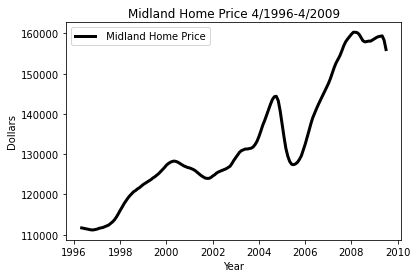

In [78]:
#import historical oil prices for Brent Crude
plt.plot( 'Date', 'Price', data=midland_validate, marker='',color='black', linewidth=3,label=' Midland Home Price')
plt.title('Midland Home Price 4/1996-4/2009')
plt.xlabel('Year')
plt.ylabel('Dollars')
# show legend
plt.legend()
# show graph
plt.show()

In [70]:
bakersfield_v = (bakersfield_long['Date'] > '1996-04-1') & (bakersfield_long['Date'] <= '2009-07-01')
bakersfield_validate =bakersfield_long.loc[bakersfield_v]

In [ ]:
#import historical oil prices for Brent Crude
plt.plot( 'Date', 'Price', data=brent, marker='',color='black', linewidth=3,label=' Monthly Avg. Price/Barrel')
plt.title('Historical Monthly Crude Oil Price')
plt.xlabel('Year')
plt.ylabel('Dollars/Barrel(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [41]:
houston_mask = (houston_long['Date'] > '1996-04-1') & (houston_long['Date'] <= '2008-07-01')
houston_prophet =houston_long.loc[houston_mask]

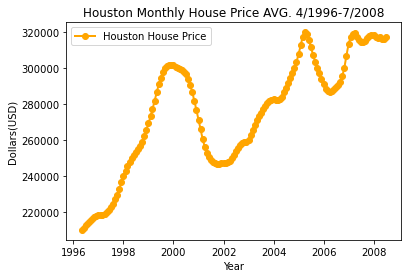

In [42]:
plt.plot( 'Date', 'Price', data=houston_prophet, marker='o', color='orange', linewidth=2, label= 'Houston House Price')
plt.title('Houston Monthly House Price AVG. 4/1996-7/2008')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [43]:
midland_mask = (midland_long['Date'] > '1996-04-1') & (midland_long['Date'] <= '2008-07-01')
midland_prophet = midland_long.loc[midland_mask]

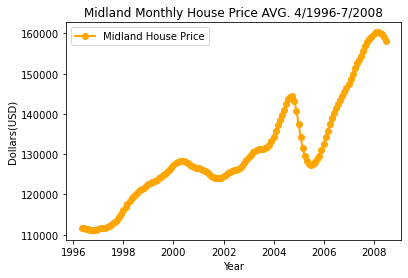

In [44]:
plt.plot( 'Date', 'Price', data=midland_prophet, marker='o', color='orange', linewidth=2, label= 'Midland House Price')
plt.title('Midland Monthly House Price AVG. 4/1996-7/2008')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [45]:
bakersfield_mask = (bakersfield_long['Date'] > '1996-04-1') & (bakersfield_long['Date'] <= '2008-07-01')
bakersfield_prophet = bakersfield_long.loc[bakersfield_mask]

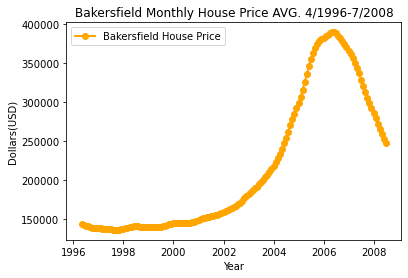

In [46]:
plt.plot( 'Date', 'Price', data= bakersfield_prophet, marker='o', color='orange', linewidth=2, label= 'Bakersfield House Price')
plt.title('Bakersfield Monthly House Price AVG. 4/1996-7/2008')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [47]:
#need to change column names for prophet to y(price) and ds(date)

In [48]:
bakersfield_prophet.rename(columns={bakersfield_prophet.columns[0]: 'ds', bakersfield_prophet.columns[1]: 'y'}, inplace=True)

C:\Users\rafav\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [49]:
midland_prophet.rename(columns={midland_prophet.columns[0]: 'ds', midland_prophet.columns[1]: 'y'}, inplace=True)

In [50]:
houston_prophet.rename(columns={houston_prophet.columns[0]: 'ds', houston_prophet.columns[1]: 'y'}, inplace=True)

In [51]:
# log of the price
houston_prophet

,ds,y
1,1996-05-01,210200.0
2,1996-06-01,211500.0
3,1996-07-01,212800.0
4,1996-08-01,214000.0
5,1996-09-01,215200.0
...,...,...
143,2008-03-01,316600.0
144,2008-04-01,316900.0
145,2008-05-01,316300.0
146,2008-06-01,315800.0


In [52]:
houston_prophet['y_orig'] = houston_prophet['y'] 
# log-transform y
houston_prophet['y'] = np.log(houston_prophet['y'])

<ipython-input-52-7360a05ccb46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houston_prophet['y_orig'] = houston_prophet['y']
<ipython-input-52-7360a05ccb46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houston_prophet['y'] = np.log(houston_prophet['y'])


In [53]:
bakersfield_prophet['y_orig'] = bakersfield_prophet['y'] 
# log-transform y
bakersfield_prophet['y'] = np.log(bakersfield_prophet['y'])

<ipython-input-53-997caeaf79f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakersfield_prophet['y_orig'] = bakersfield_prophet['y']
<ipython-input-53-997caeaf79f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakersfield_prophet['y'] = np.log(bakersfield_prophet['y'])


In [54]:
bakersfield_prophet

,ds,y,y_orig
1,1996-05-01,11.868500,142700.0
2,1996-06-01,11.862173,141800.0
3,1996-07-01,11.855806,140900.0
4,1996-08-01,11.850112,140100.0
5,1996-09-01,11.845103,139400.0
...,...,...,...
143,2008-03-01,12.514292,272200.0
144,2008-04-01,12.487485,265000.0
145,2008-05-01,12.462264,258400.0
146,2008-06-01,12.438374,252300.0


In [61]:
midland_prophet['y_orig'] = midland_prophet['y'] 
# log-transform y
midland_prophet['y'] = np.log(midland_prophet['y'])

<ipython-input-61-8aff09ba146d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midland_prophet['y_orig'] = midland_prophet['y']
<ipython-input-61-8aff09ba146d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midland_prophet['y'] = np.log(midland_prophet['y'])


In [57]:
midland_prophet

,ds,y,y_orig
1,1996-05-01,11.623572,111700.0
2,1996-06-01,11.622676,111600.0
3,1996-07-01,11.621780,111500.0
4,1996-08-01,11.620883,111400.0
5,1996-09-01,11.619985,111300.0
...,...,...,...
143,2008-03-01,11.984802,160300.0
144,2008-04-01,11.984178,160200.0
145,2008-05-01,11.981678,159800.0
146,2008-06-01,11.976659,159000.0


In [56]:
houston_prophet.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\houston_prophet.csv', index=False)

In [62]:
midland_prophet.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\midland_prophet.csv', idnex=False)

In [63]:
bakersfield_prophet.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\bakersfield_prophet.csv', index=False)

### Check Stationarity Using the Augmented Dickey Fuller Test
 - ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

  - Null Hypothesis: The series has a unit root.

  - Alternate Hypothesis: The series has no unit root.

  - If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [42]:
#Assign variable to timeseries (house prices)
X1= houston_long['Price']
X2= midland_long['Price']
X3 = bakersfield_long['Price']

In [43]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [44]:
adf_test(X1)

Results of Dickey-Fuller Test:
Test Statistic                  -0.957004
p-value                          0.768622
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [45]:
adf_test(X2)

Results of Dickey-Fuller Test:
Test Statistic                   1.203989
p-value                          0.996013
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [46]:
adf_test(X3)

Results of Dickey-Fuller Test:
Test Statistic                  -2.035036
p-value                          0.271425
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


### Because all of the p values are >.05 we fail to reject the null hypothesis. These house prices represent non-stationary series and need differencing.

In [59]:
midland_long.set_index('Date', inplace=True)

In [60]:
# differencing the time series 

midland_stationary = midland_long.diff().dropna()

In [61]:
midland_stationary

,Price
Date,
1996-05-01,-100.0
1996-06-01,-100.0
1996-07-01,-100.0
1996-08-01,-100.0
1996-09-01,-100.0
...,...
2017-12-01,-1300.0
2018-01-01,100.0
2018-02-01,2500.0


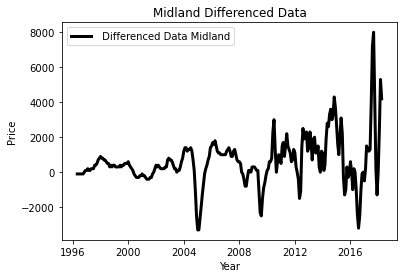

In [63]:
#import historical oil prices for Brent Crude
plt.plot( 'Price', data=midland_stationary, marker='',color='black', linewidth=3,label=' Differenced Data Midland')
plt.title('Midland Differenced Data')
plt.xlabel('Year')
plt.ylabel('Price')
# show legend
plt.legend()
# show graph
plt.show()

In [64]:
bakersfield_long.set_index('Date', inplace=True)

In [72]:
bakersfield_stationary = bakersfield_long.diff().dropna()

In [73]:
bakersfield_stationary

,Price
Date,
1996-05-01,-900.0
1996-06-01,-900.0
1996-07-01,-900.0
1996-08-01,-800.0
1996-09-01,-700.0
...,...
2017-12-01,800.0
2018-01-01,1400.0
2018-02-01,1400.0


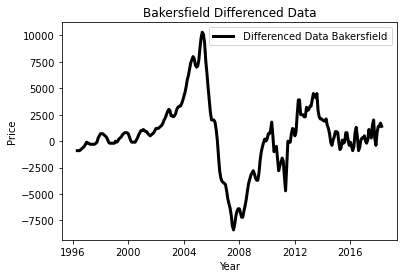

In [74]:
#import historical oil prices for Brent Crude
plt.plot( 'Price', data=bakersfield_stationary, marker='',color='black', linewidth=3,label=' Differenced Data Bakersfield')
plt.title('Bakersfield Differenced Data')
plt.xlabel('Year')
plt.ylabel('Price')
# show legend
plt.legend()
# show graph
plt.show()

In [68]:
houston_long.set_index('Date', inplace=True)

In [69]:
houston_stationary = houston_long.diff().dropna()

In [70]:
houston_stationary

,Price
Date,
1996-05-01,1000.0
1996-06-01,1300.0
1996-07-01,1300.0
1996-08-01,1200.0
1996-09-01,1200.0
...,...
2017-12-01,2700.0
2018-01-01,1300.0
2018-02-01,600.0


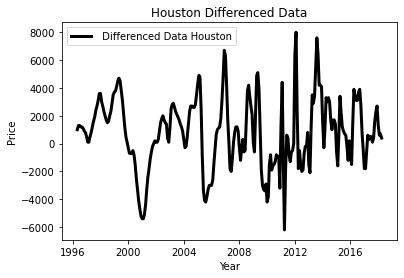

In [71]:
#import historical oil prices for Brent Crude
plt.plot( 'Price', data=houston_stationary, marker='',color='black', linewidth=3,label=' Differenced Data Houston')
plt.title('Houston Differenced Data')
plt.xlabel('Year')
plt.ylabel('Price')
# show legend
plt.legend()
# show graph
plt.show()

In [ ]:
#running stationarity again

## EDA

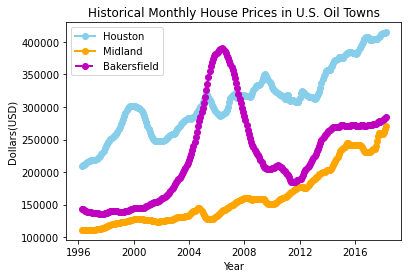

In [42]:
# multiple line plots
plt.plot( 'Date', 'Price', data=houston_long, marker='o',color='skyblue', linewidth=2,label='Houston')
plt.plot( 'Date', 'Price', data=midland_long, marker='o', color='orange', linewidth=2, label= 'Midland')
plt.plot( 'Date', 'Price', data=bakersfield_long, marker='o', color='m', linewidth=2, linestyle='dashed', label='Bakersfield')
plt.title('Historical Monthly House Prices in U.S. Oil Towns')
plt.xlabel('Year')
plt.ylabel('Dollars(USD)')
# show legend
plt.legend()
# show graph
plt.show()

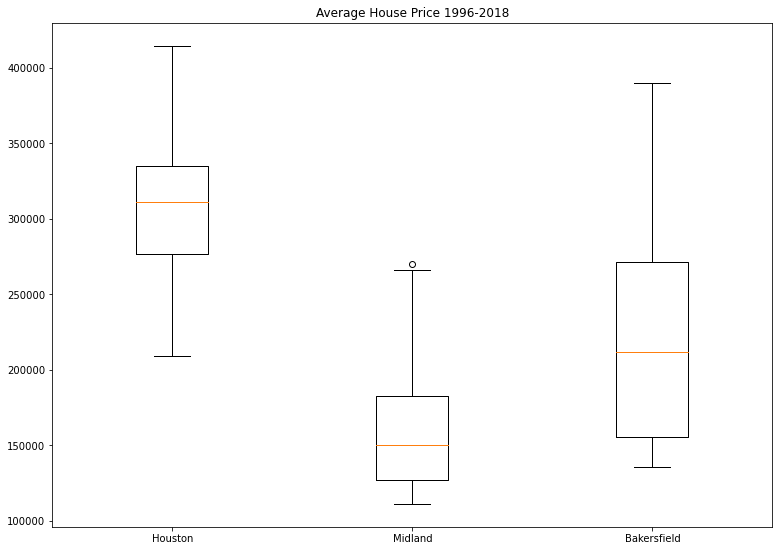

In [82]:
data = [houston_long['Price'], midland_long['Price'], bakersfield_long['Price']]
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

# x-axis labels 
ax.set_xticklabels(['Houston', 'Midland',  
                    'Bakersfield']) 
  
# Adding title  
plt.title("Average House Price 1996-2018") 
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
plt.show() 

In [64]:
houston_mask_long = (houston_long['Date'] > '1996-04-1') & (houston_long['Date'] <= '2008-07-01')
Houston = houston_long.loc[houston_mask_long]

In [65]:
bakersfield_mask_long = (bakersfield_long['Date'] > '1996-04-1') & (bakersfield_long['Date'] <= '2008-07-01')
Bakersfield= bakersfield_long.loc[bakersfield_mask_long]

In [66]:
midland_mask_long = (midland_long['Date'] > '1996-04-1') & (midland_long['Date'] <= '2008-07-01')
Midland = midland_long.loc[midland_mask_long]

In [43]:
brent = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\Europe_Brent_Spot_Price_FOB_Monthly.csv')

In [44]:
brent.head()

,4/1/2018,72.11
0,3/1/2018,66.02
1,2/1/2018,65.32
2,1/1/2018,69.08
3,12/1/2017,64.37
4,11/1/2017,62.71


In [45]:
brent.rename(columns={brent.columns[0]: 'Date', brent.columns[1]: 'Price'}, inplace=True)

In [46]:
brent['Date'] =pd.to_datetime(brent['Date'])

In [47]:
brent.head()

,Date,Price
0,2018-03-01,66.02
1,2018-02-01,65.32
2,2018-01-01,69.08
3,2017-12-01,64.37
4,2017-11-01,62.71


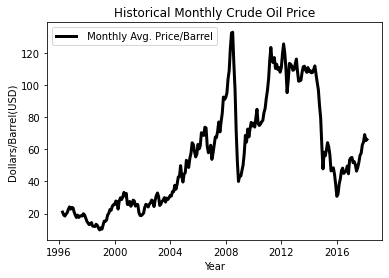

In [48]:
#import historical oil prices for Brent Crude
plt.plot( 'Date', 'Price', data=brent, marker='',color='black', linewidth=3,label=' Monthly Avg. Price/Barrel')
plt.title('Historical Monthly Crude Oil Price')
plt.xlabel('Year')
plt.ylabel('Dollars/Barrel(USD)')
# show legend
plt.legend()
# show graph
plt.show()

In [67]:
Midland.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\midland.csv',index=False)

In [68]:
Houston.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\houston.csv',index=False)

In [69]:
Bakersfield.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\bakersfield.csv',index=False)

In [112]:
brent.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\brent.csv', index=False)

In [75]:
midland_stationary.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\Midland_stationary.csv', index=False)

In [76]:
houston_stationary.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\Houston_stationary.csv',index=False)

In [77]:
bakersfield_stationary.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 4\mod 4 final project\Bakersfield_stationary.csv',index=False)